In [1]:
import os
import pandas as pd
from circum import xy_values
import cv2 as cv
import matplotlib.pyplot as plt
import ast
import numpy as np
from pathlib import Path
import shutil
import random

In [2]:
os.chdir("../Annotation projects/ACFR/mangoes")

In [3]:
# all_images = os.listdir("images")

In [4]:
# val_set = random.sample(all_images,int(0.2*len(all_images)))
# test_set = random.sample(list(np.setdiff1d(all_images,val_set)),int(0.2*len(all_images)))
# train_set = np.setdiff1d(list(np.setdiff1d(all_images,val_set)),test_set)

In [5]:
# set_ = "val"
# for i in val_set:
#     src_train = os.path.join("images", i)
#     dest_train = os.path.join("{}_images".format(set_),i)
#     annot_name, ext = os.path.splitext(i)
#     src_csv = os.path.join("annotations", annot_name+".csv")
#     dest_csv = os.path.join("{}_csv".format(set_),annot_name+".csv")
#     shutil.copy(src_train,dest_train)
#     shutil.copy(src_csv,dest_csv)
    

In [6]:
def center_radius(x,y,dx,dy):
    cx = x+(0.5*dx)
    cy = y+(0.5*dy)
    radius = 0.5*(max(dx,dy))
    return cx,cy, radius

In [7]:
images_path = os.path.join(os.getcwd(),"test_images")
annotations_path = os.path.join(os.getcwd(),"test_csv")

## ONE

In [8]:
# ['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
#        'region_shape_attributes', 'region_attributes']

In [9]:
annotations_list = os.listdir(annotations_path)
a = annotations_list[0]
a
df_a = pd.read_csv(os.path.join(annotations_path,a))
df_a
image_name =  a.replace(".csv",".png")
img = cv.imread(os.path.join(images_path,image_name))
for row in range(len(df_a)):
    cx,cy, radius_ =center_radius(df_a.at[row,"x"],df_a.at[row,"y"],\
             df_a.at[row,"dx"],df_a.at[row,"dy"])
    df_a.at[row,"cx"] = cx
    df_a.at[row,"cy"] = cy
    df_a.at[row,"radius"] = radius_
    df_a.at[row,"filename"] = image_name
    df_a.at[row,"file_attributes"] = "{}"
    df_a.at[row,"region_count"] = len(df_a)
    df_a.at[row,'region_id'] = row
    df_a.at[row,"file_size"] = Path(os.path.join(images_path,image_name)).stat().st_size
    t = {"name":"polygon","all_points_x":None,"all_points_y":None}
    x,y = xy_values(df_a.at[row,"cx"],df_a.at[row,"cy"],df_a.at[row,"radius"],img.shape[0],img.shape[1])
    t['all_points_x']  = x
    t['all_points_y'] = y
    df_a.at[row,'region_shape_attributes'] = str(t)
    df_a.at[row,"region_attributes"] = "{}"

In [10]:
df_a["file_size"] = df_a["file_size"].astype("int64")
df_a["region_count"] = df_a["region_count"].astype("int64")
df_a['region_id'] = df_a['region_id'].astype("int64")
df_a

,#item,x,y,dx,dy,label,cx,cy,radius,filename,file_attributes,region_count,region_id,file_size,region_shape_attributes,region_attributes
0,0,10.625,111.875,28.814371,34.83026,1,25.032186,129.29013,17.41513,20151124T030850.545556_i1881j646.png,{},2,0,1024653,"{'name': 'polygon', 'all_points_x': [42, 42, 4...",{}
1,1,357.500,249.375,28.814371,34.83026,1,371.907186,266.79013,17.41513,20151124T030850.545556_i1881j646.png,{},2,1,1024653,"{'name': 'polygon', 'all_points_x': [389, 389,...",{}


## LOOP THROUGH ALL 3 SETS

In [11]:
for set_ in ["train", "val", "test"]:
    if os.path.exists("{}_final.csv".format(set_)):
        continue
    images_path = os.path.join(os.getcwd(),"{}_images".format(set_))
    annotations_path = os.path.join(os.getcwd(),"{}_csv".format(set_))
    annotations_list = os.listdir(annotations_path)
    metadf = pd.DataFrame(columns=['#item',
     'x',
     'y',
     'dx',
     'dy',
     'label',
     'cx',
     'cy',
     'radius',
     'filename',
     'file_attributes',
     'region_count',
     'region_id',
     'file_size',
     'region_shape_attributes',
     'region_attributes'])
    for index,annotation in enumerate(annotations_list):
        df_a = pd.read_csv(os.path.join(annotations_path,annotation))
        df_a
        image_name =  annotation.replace(".csv",".png")
        img = cv.imread(os.path.join(images_path,image_name))
        for row in range(len(df_a)):
            cx,cy, radius_ =center_radius(df_a.at[row,"x"],df_a.at[row,"y"],\
                     df_a.at[row,"dx"],df_a.at[row,"dy"])
            df_a.at[row,"cx"] = cx
            df_a.at[row,"cy"] = cy
            df_a.at[row,"radius"] = radius_
            df_a.at[row,"filename"] = image_name
            df_a.at[row,"file_attributes"] = "{}"
            df_a.at[row,"region_count"] = len(df_a)
            df_a.at[row,'region_id'] = row
            df_a.at[row,"file_size"] = Path(os.path.join(images_path,image_name)).stat().st_size
            t = {"name":"polygon","all_points_x":None,"all_points_y":None}
            x,y = xy_values(df_a.at[row,"cx"],df_a.at[row,"cy"],df_a.at[row,"radius"],img.shape[0],img.shape[1])
            t['all_points_x']  = x
            t['all_points_y'] = y
            df_a.at[row,'region_shape_attributes'] = str(t)
            df_a.at[row,"region_attributes"] = "{}"
        metadf = pd.concat([metadf, df_a], ignore_index=True, sort=False)
    metadf["file_size"] = metadf["file_size"].astype("int64")
    metadf["region_count"] = metadf["region_count"].astype("int64")
    metadf['region_id'] = metadf['region_id'].astype("int64")
    metadf
    metadf2=metadf.drop(['#item', 'cx','cy','radius','label','x','y'], axis = 1) 
    metadf2 = metadf[['filename', 'file_size',
           'file_attributes', 'region_count', 'region_id',
           'region_shape_attributes', 'region_attributes']]
    metadf2.to_csv("{}_final.csv".format(set_), index=False)

## TEST

In [12]:
# Note that this section will only effected on the last item on the 
# sets loop. We presume that if the testing shows good results
# on the one time it should also be same for all the other items.

# It looks OK.

2
20151124T032406.268290_i1704j1072.png


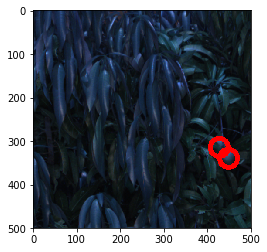

In [19]:
set2 = "train"
metadf22 = pd.read_csv("{}_final.csv".format(set2))
a = metadf22.loc[metadf22["filename"]==random.choice(metadf22["filename"].unique())]
a = a.reset_index(drop=True)
print(len(a))
image = cv.imread(os.path.join("{}_images".format(set2),a.iloc[0]["filename"]))
print(a.iloc[0]["filename"])
all_points = []
for i in range(len(a)):
    pts = []
    x = ast.literal_eval(a.iloc[i]["region_shape_attributes"])["all_points_x"]
    y = ast.literal_eval(a.iloc[i]["region_shape_attributes"])["all_points_y"]
    for i,j in zip(x,y):
        pts.append([i,j])
    all_points.append(pts)

ptss = np.array(all_points)
img = cv.polylines(image,np.int32(ptss),isClosed=True,color=(255,0,0),thickness=10)
plt.imshow(image)
plt.show()
plt.close()

## Generate file names for all 3 sets

In [22]:
def WriteSets(set_path, set_name):
    files = os.listdir(set_path)
    if os.path.exists("sets/{}_filenames.txt".format(set_name)):
        print("File already exist. Skipping")
        return None
    with open("sets/{}_filenames.txt".format(set_name),"a+") as fp:
        for line in files:
            if line.startswith("via"): #skip annotations file
                continue
            fp.write(line+"\n")

In [23]:
train_images = "train_images"
test_images = "test_images"
val_images = "val_images"
all_images = "images"
WriteSets(train_images,"acfr_mangoes_train")
WriteSets(test_images,"acfr_mangoes_test")
WriteSets(val_images,"acfr_mangoes_val")
WriteSets(all_images,"acfr_mangoes_all")

# ROUGH SPACE

In [20]:
#split images into trainset and test set
all_images = os.listdir(os.path.join(os.getcwd(),"images"))

FileNotFoundError: [Errno 2] No such file or directory: '/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/Masters by Research/Mask RCNN/Annotation projects/ACFR/mangoes/images'

In [ ]:
train = random.sample(all_images,int(0.75*len(all_images)))

In [ ]:
len(train)

In [ ]:
for image in train:
    source_image = os.path.join(os.getcwd(),"images",image)
    print(source)
    dest_image = os.path.join(os.getcwd(),"train_images",image)
    shutil.move(source_image,dest_image)
    csv =  image.replace(".png",".csv")
    source_csv = os.path.join(os.getcwd(),"annotations",csv)
    dest_csv = os.path.join(os.getcwd(),"train_csv",csv)
    shutil.move(source_csv,dest_csv)